In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/6414 Project")

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df = df.drop(columns = ["homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "Keywords"]) 
df["collectionYN"] = df["belongs_to_collection"].notnull()*1
df = df.drop(columns = ["belongs_to_collection", "genres"]) 
df["EnYN"] = (df['original_language'] == "en")*1
df = df[df["status"] == "Released"]
df = df.drop(columns = ["status", "original_language"])


#top 3-5 for genres and lang, production company, production country,  dummy var

#count spoken lang
#drop four rumor movie rows frop the status, tagline

In [ ]:

df = df[df["revenue"]>=10000]

In [ ]:
import ast
df= df[df["spoken_languages"].notnull()]

df["spoken_languages"] = df["spoken_languages"].apply(lambda x: ast.literal_eval(x))
df["spoken_languages"] = df["spoken_languages"].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df

,id,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,cast,crew,revenue,collectionYN,EnYN
0,1,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,1,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1
1,2,40000000,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,1
2,3,3300000,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,1,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,1200000,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,2,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
4,5,0,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,1,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,1,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1
2996,2997,0,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,1,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,0
2997,2998,65000000,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,1,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,1
2998,2999,42000000,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,1,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,0,1


In [ ]:

df= df[df["cast"].notnull()]
df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x))


In [ ]:
df= df[df["crew"].notnull()]
df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x))

In [ ]:
res = []
for i in df["crew"]:
  comb = []
  for j in i:
    
    if j["job"] == 'Director':
      comb.append(j["name"])
  res.append(comb)
res = np.array(res)
df["Director"] = res
df = df.drop(columns = ["crew"]) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


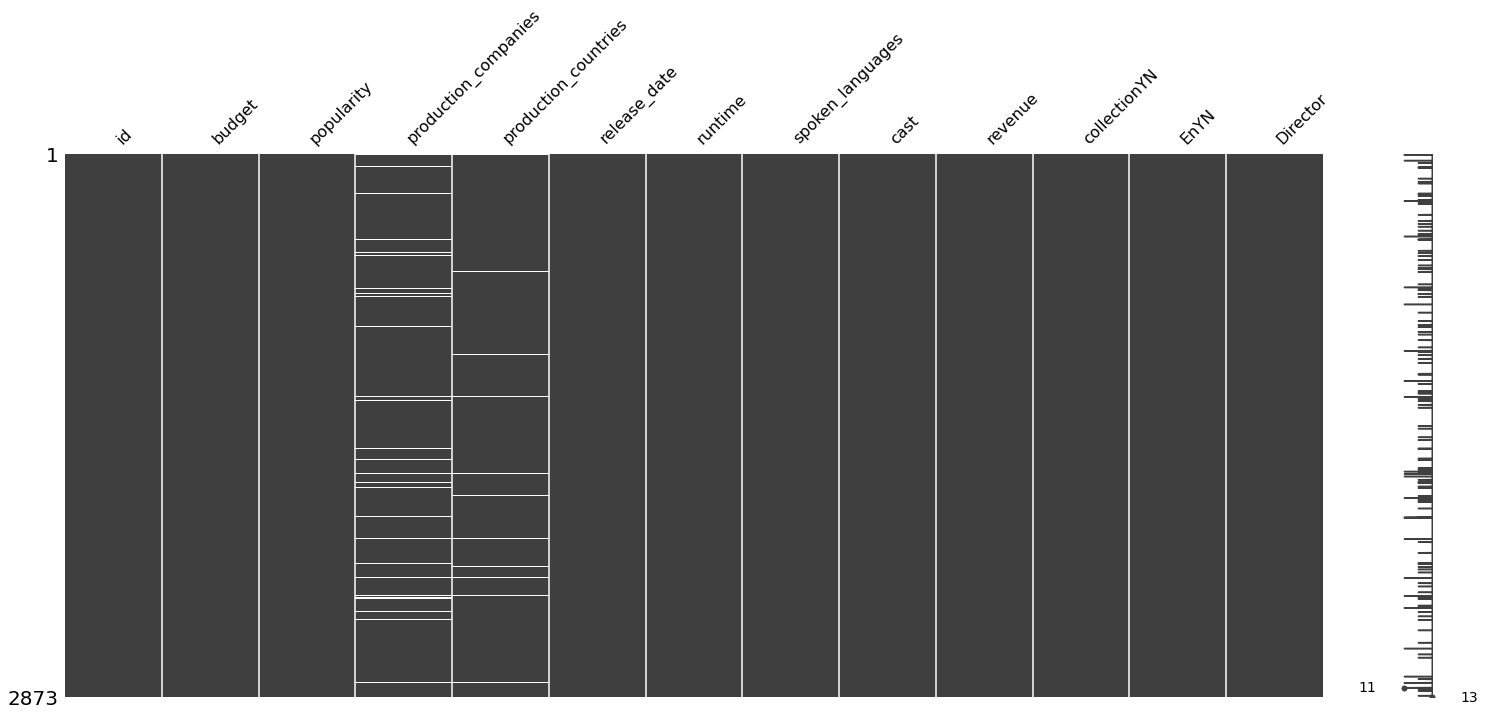

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df["production_companies"] = df["production_companies"].apply(lambda x: ast.literal_eval(x) if type(x)==str else x)


In [ ]:
df = df.drop(columns = ["production_countries"]) 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math


X = df[['budget', 'popularity',	'runtime',	'spoken_languages',	'collectionYN',	'EnYN']]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy =True, with_mean = True, with_std = True)
#X = scaler.transform(X)
y = df['revenue']#.apply(lambda x: math.log(x))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


df_standardized = pd.DataFrame(temp, columns = ['budget', 'popularity', 'runtime'])

NameError: ignored

In [ ]:
df

,Name,Age,crew
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2995,NaN,NaN,NaN
2996,NaN,NaN,NaN
2997,NaN,NaN,NaN
2998,NaN,NaN,NaN


In [ ]:

model = LinearRegression().fit(x_train, y_train)


In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

44946527.32146816

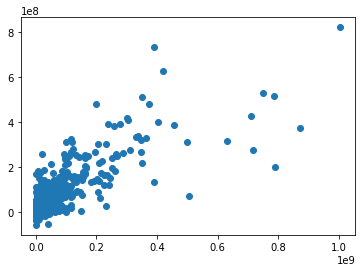

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)

In [ ]:
model.score(x_test, y_test)

0.5970585865541684

In [ ]:
model.err

AttributeError: ignored

In [ ]:
import pandas as pd

# df = pd.read_csv('train.csv')

def director_from_crew(crew):
    dir = ""
    for x in crew:
        if x["job"] == "Director":
            dir = x["name"]
    return dir

crew = [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451395, 'job': 'Associate Producer', 'name': 'Adam Blum', 'profile_path': None}, {'credit_id': '5524ed5a925141720c00112c', 'department': 'Production', 'gender': 2, 'id': 52997, 'job': 'Executive Producer', 'name': 'Rob Corddry', 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'credit_id': '5524ed85c3a3687e0e000f56', 'department': 'Production', 'gender': 0, 'id': 62807, 'job': 'Executive Producer', 'name': 'Ben Ormand', 'profile_path': None}, {'credit_id': '5524ed9fc3a3687e0e000f59', 'department': 'Sound', 'gender': 2, 'id': 23486, 'job': 'Original Music Composer', 'name': 'Christophe Beck', 'profile_path': '/2fnJUmCk6IEpVIptpYaUk31epHx.jpg'}, {'credit_id': '5524eda6c3a3687e03000d28', 'department': 'Camera', 'gender': 2, 'id': 6117, 'job': 'Director of Photography', 'name': 'Declan Quinn', 'profile_path': None}, {'credit_id': '5524edb4925141720c00113d', 'department': 'Editing', 'gender': 0, 'id': 1451396, 'job': 'Editor', 'name': 'Jamie Gross', 'profile_path': None}, {'credit_id': '5524edc1925141727600102e', 'department': 'Production', 'gender': 0, 'id': 22219, 'job': 'Casting', 'name': 'Susie Farris', 'profile_path': None}, {'credit_id': '5524edd192514171cb008257', 'department': 'Art', 'gender': 0, 'id': 1002643, 'job': 'Production Design', 'name': 'Ryan Berg', 'profile_path': None}, {'credit_id': '555ad9be9251411e5b00d485', 'department': 'Production', 'gender': 2, 'id': 57431, 'job': 'Executive Producer', 'name': 'Matt Moore', 'profile_path': None}, {'credit_id': '5677e93bc3a36816890087dc', 'department': 'Directing', 'gender': 0, 'id': 1551818, 'job': 'Script Supervisor', 'name': 'Nicole Garcea', 'profile_path': None}, {'credit_id': '5677e96a92514179e10093d0', 'department': 'Production', 'gender': 0, 'id': 1551819, 'job': 'Production Coordinator', 'name': 'Jason Salzman', 'profile_path': None}, {'credit_id': '5677e98492514179d2008cd9', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1422996, 'job': 'Costume Design', 'name': 'Carol Cutshall', 'profile_path': None}, {'credit_id': '5677e9d5c3a368168e009414', 'department': 'Art', 'gender': 2, 'id': 500199, 'job': 'Set Decoration', 'name': 'Tim Cohn', 'profile_path': None}, {'credit_id': '5677f89d9251417845001a61', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1527917, 'job': 'Hair Department Head', 'name': 'Voni Hinkle', 'profile_path': None}, {'credit_id': '5677f8b392514179dd0089fb', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1431554, 'job': 'Makeup Department Head', 'name': 'Remi Savva', 'profile_path': None}, {'credit_id': '5677f8d1c3a3681689008a4b', 'department': 'Art', 'gender': 0, 'id': 66495, 'job': 'Art Direction', 'name': 'Jason Baldwin Stewart', 'profile_path': None}, {'credit_id': '5677f8eec3a3681685008dd5', 'department': 'Production', 'gender': 0, 'id': 1412466, 'job': 'Production Supervisor', 'name': 'Korey Budd', 'profile_path': None}, {'credit_id': '5677f90a9251417845001a7d', 'department': 'Sound', 'gender': 0, 'id': 1401562, 'job': 'Sound Re-Recording Mixer', 'name': 'Gary C. Bourgeois', 'profile_path': None}, {'credit_id': '5677f91e9251417845001a84', 'department': 'Sound', 'gender': 0, 'id': 1396794, 'job': 'Sound Re-Recording Mixer', 'name': 'Gabriel J. Serrano', 'profile_path': None}, {'credit_id': '5677f938c3a3681680008dd4', 'department': 'Editing', 'gender': 0, 'id': 13168, 'job': 'Dialogue Editor', 'name': 'Victoria Rose Sampson', 'profile_path': None}, {'credit_id': '5677f94e92514179dd008a1f', 'department': 'Sound', 'gender': 0, 'id': 1551839, 'job': 'Production Sound Mixer', 'name': 'Michael B. Koff', 'profile_path': None}, {'credit_id': '5677f968c3a368168e009698', 'department': 'Sound', 'gender': 0, 'id': 113052, 'job': 'Sound Effects Editor', 'name': 'Randall Guth', 'profile_path': None}, {'credit_id': '5677f98dc3a3681685008e02', 'department': 'Crew', 'gender': 2, 'id': 1442535, 'job': 'Stunt Coordinator', 'name': 'Chuck Picerni Jr.', 'profile_path': '/yE5QtXUzcrnCzMRctZL8F5g842B.jpg'}, {'credit_id': '5677f9a692514179dd008a49', 'department': 'Camera', 'gender': 0, 'id': 1437305, 'job': 'Camera Operator', 'name': 'Michael Applebaum', 'profile_path': None}, {'credit_id': '5677f9bd9251417845001aae', 'department': 'Camera', 'gender': 0, 'id': 1401765, 'job': 'Still Photographer', 'name': 'Steve Dietl', 'profile_path': None}, {'credit_id': '5677f9e592514179e7008bf7', 'department': 'Lighting', 'gender': 0, 'id': 1402721, 'job': 'Rigging Gaffer', 'name': 'Tarik Naim Alherimi', 'profile_path': None}, {'credit_id': '5677f9f4c3a368167c0090ed', 'department': 'Lighting', 'gender': 0, 'id': 1402719, 'job': 'Gaffer', 'name': 'Paul Olinde', 'profile_path': None}, {'credit_id': '5677fa21c3a368168e0096ca', 'department': 'Sound', 'gender': 0, 'id': 1551840, 'job': 'Music Supervisor', 'name': 'Steve Griffen', 'profile_path': None}, {'credit_id': '5677fa31c3a3681680008e04', 'department': 'Sound', 'gender': 0, 'id': 1551841, 'job': 'Music Editor', 'name': 'Matt Fausak', 'profile_path': None}, {'credit_id': '5677fa4392514179dd008a76', 'department': 'Sound', 'gender': 0, 'id': 1551840, 'job': 'Music Editor', 'name': 'Steve Griffen', 'profile_path': None}, {'credit_id': '5677fa609251417845001acf', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1403416, 'job': 'Costume Supervisor', 'name': 'Shonta T. McCray', 'profile_path': None}, {'credit_id': '5677fa8492514179d2008fb3', 'department': 'Camera', 'gender': 0, 'id': 1425831, 'job': 'Steadicam Operator', 'name': 'Mark Karavite', 'profile_path': None}, {'credit_id': '5677fab2c3a3681689008ac3', 'department': 'Camera', 'gender': 0, 'id': 1551842, 'job': 'First Assistant Camera', 'name': 'Joe Waistell', 'profile_path': None}, {'credit_id': '5677faecc3a368168e0096fe', 'department': 'Sound', 'gender': 0, 'id': 58362, 'job': 'Supervising Sound Editor', 'name': 'Michael Hilkene', 'profile_path': None}, {'credit_id': '59ac0368c3a3682c0a02c484', 'department': 'Crew', 'gender': 0, 'id': 1881584, 'job': 'Additional Writing', 'name': 'John Karnay', 'profile_path': None}, {'credit_id': '59ac0411c3a3682bf0028966', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1431552, 'job': 'Hairstylist', 'name': 'Daina Daigle', 'profile_path': None}, {'credit_id': '59ac0504925141072302b8fb', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1712001, 'job': 'Makeup Artist', 'name': 'Allison Gordin', 'profile_path': None}, {'credit_id': '59ac0570c3a3682bf0028aac', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 578725, 'job': 'Makeup Artist', 'name': 'Darryl Lucas', 'profile_path': None}, {'credit_id': '59ac05a4925141077e02c97e', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1463274, 'job': 'Makeup Artist', 'name': 'Annabelle MacNeal', 'profile_path': None}, {'credit_id': '59ac05c6925141076502d106', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1881586, 'job': 'Makeup Artist', 'name': 'Marina Savva', 'profile_path': None}, {'credit_id': '59ac0615c3a3682c480296aa', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1406267, 'job': 'Hairstylist', 'name': 'Carl G. Variste', 'profile_path': None}, {'credit_id': '59ac06ba925141076502d1fa', 'department': 'Directing', 'gender': 0, 'id': 1798593, 'job': 'First Assistant Director', 'name': 'Josh King', 'profile_path': None}, {'credit_id': '59ac06f1c3a3682c2202aca0', 'department': 'Art', 'gender': 0, 'id': 1415083, 'job': 'Greensman', 'name': 'Scott C. Bivona', 'profile_path': None}, {'credit_id': '59ac072c925141076502d260', 'department': 'Art', 'gender': 0, 'id': 1881587, 'job': 'Title Designer', 'name': 'Eunha Choi', 'profile_path': None}, {'credit_id': '59ac077c925141077e02cb62', 'department': 'Art', 'gender': 0, 'id': 1585302, 'job': 'Construction Coordinator', 'name': 'Daniel Coe', 'profile_path': None}, {'credit_id': '59ac07e0925141078a02d842', 'department': 'Art', 'gender': 0, 'id': 1495523, 'job': 'Set Designer', 'name': 'Spencer Davison', 'profile_path': None}, {'credit_id': '59ac0862925141072f02cf6f', 'department': 'Art', 'gender': 0, 'id': 1881589, 'job': 'Painter', 'name': 'Sonia L. Garcia', 'profile_path': None}, {'credit_id': '59ac08e0c3a3682bf0028e51', 'department': 'Art', 'gender': 0, 'id': 1424896, 'job': 'Art Department Coordinator', 'name': 'Caleb Guillotte', 'profile_path': None}, {'credit_id': '59ac0920c3a3682c2202af36', 'department': 'Art', 'gender': 0, 'id': 1393375, 'job': 'Leadman', 'name': "Pat A. O'Connor", 'profile_path': None}, {'credit_id': '59ac095592514107af02cc39', 'department': 'Art', 'gender': 0, 'id': 1881592, 'job': 'Set Designer', 'name': 'Brendan Turrill', 'profile_path': None}, {'credit_id': '59ac0989925141072302bdfa', 'department': 'Art', 'gender': 2, 'id': 76497, 'job': 'Property Master', 'name': 'Brook Yeaton', 'profile_path': None}, {'credit_id': '59ac0a2cc3a3682c9c02add1', 'department': 'Sound', 'gender': 0, 'id': 1881596, 'job': 'Boom Operator', 'name': 'Matthew Armstrong', 'profile_path': None}, {'credit_id': '59ac0aa8925141072f02d282', 'department': 'Visual Effects', 'gender': 2, 'id': 1558086, 'job': 'Special Effects Supervisor', 'name': 'Matt Kutcher', 'profile_path': None}, {'credit_id': '59ac0b2ac3a3682c2202b192', 'department': 'Crew', 'gender': 2, 'id': 1558087, 'job': 'Special Effects Coordinator', 'name': 'Eric Roberts', 'profile_path': None}, {'credit_id': '59ac0b7ac3a3682c2202b1fb', 'department': 'Visual Effects', 'gender': 0, 'id': 1392098, 'job': 'Visual Effects Supervisor', 'name': 'Rocco Passionino', 'profile_path': None}, {'credit_id': '59ac0bbe925141077e02d0c4', 'department': 'Visual Effects', 'gender': 0, 'id': 1558716, 'job': 'Visual Effects Coordinator', 'name': 'Joseph Payo', 'profile_path': None}, {'credit_id': '59ac0bf2c3a3682cc802cefa', 'department': 'Visual Effects', 'gender': 0, 'id': 1408784, 'job': 'Visual Effects Producer', 'name': 'Chris Roff', 'profile_path': None}, {'credit_id': '59ac0c51c3a3682c48029d99', 'department': 'Lighting', 'gender': 0, 'id': 1881600, 'job': 'Best Boy Electric', 'name': 'Ulyan Atamanyuk', 'profile_path': None}, {'credit_id': '59ac0cbac3a3682c0a02cff6', 'department': 'Camera', 'gender': 0, 'id': 1881602, 'job': 'Key Grip', 'name': 'Chris Ekstrom', 'profile_path': None}, {'credit_id': '59ac0d54925141072f02d5e6', 'department': 'Lighting', 'gender': 0, 'id': 1484984, 'job': 'Best Boy Electric', 'name': 'Brad Garris', 'profile_path': None}, {'credit_id': '59ac0db0925141078a02df86', 'department': 'Camera', 'gender': 0, 'id': 1881603, 'job': 'Dolly Grip', 'name': 'Kendell Joseph', 'profile_path': None}, {'credit_id': '59ac0e5a925141077e02d39f', 'department': 'Camera', 'gender': 0, 'id': 1549179, 'job': 'Dolly Grip', 'name': 'Spencer Wilcox', 'profile_path': None}, {'credit_id': '59ac0e9f925141079d02bee6', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1552626, 'job': 'Key Costumer', 'name': 'Sarah P. Koeppe', 'profile_path': None}, {'credit_id': '59ac0ec1c3a3682bf0029524', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1881605, 'job': 'Seamstress', 'name': 'Catherine Rodi', 'profile_path': None}, {'credit_id': '59ac0eef925141070702c7ff', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 1463801, 'job': 'Seamstress', 'name': 'Giselle Spence', 'profile_path': None}, {'credit_id': '59ac0f5dc3a3682c4802a0f5', 'department': 'Production', 'gender': 0, 'id': 1400837, 'job': 'Location Manager', 'name': 'John A. Johnston', 'profile_path': None}, {'credit_id': '59ac0ff2c3a3682c4802a196', 'department': 'Crew', 'gender': 0, 'id': 1844322, 'job': 'Production Controller', 'name': 'Gail Marks', 'profile_path': None}]
dir = director_from_crew(crew)
df['Director'] = df["crew"].apply(director_from_crew)

dir_df = pd.read_csv('directors.txt')
dir_df = dir_df.rename(columns={"Name": "Director"})
# print(dir_df)

res = pd.merge(df,dir_df,on='Director')


TypeError: ignored

In [ ]:
df["Director"] = df["Director"].apply(lambda x: x[0])

In [ ]:
dir = director_from_crew(crew)

dir_df = pd.read_csv('directors.txt')
dir_df = dir_df.rename(columns={"Name": "Director"})


dir_df

,Rank,Director,Worldwide Box Office,Movies,Average
0,1,Steven Spielberg,$10.548.605.203,36,$293.016.811
1,2,Anthony Russo,$6.839.063.507,7,$977.009.072
2,3,Joe Russo,$6.839.063.507,8,$854.882.938
3,4,Peter Jackson,$6.535.061.813,14,$466.790.130
4,5,Michael Bay,$6.443.668.115,16,$402.729.257
...,...,...,...,...,...
995,996,Eugenio Derbez,$100.486.616,1,$100.486.616
996,997,Takashi Miike,$100.092.515,21,$4.766.310
997,998,Mervyn LeRoy,$100.036.499,8,$12.504.562
998,999,Zhao Wei,$100.030.000,1,$100.030.000


In [ ]:
res = pd.merge(df,dir_df,on='Director', how= "left")

In [ ]:
res = res.rename(columns = {"Average": "DirectorRev"})

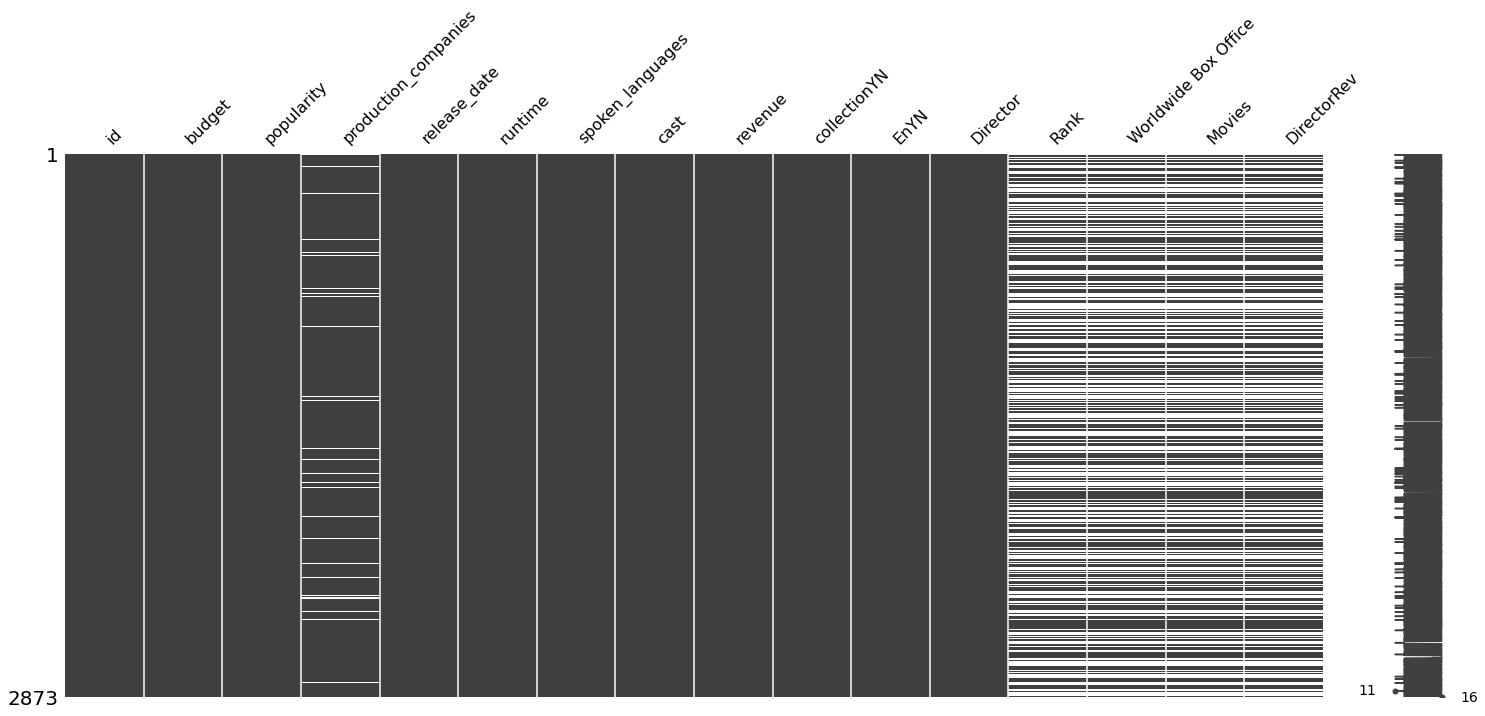

In [ ]:
msno.matrix(res)

In [ ]:
model.coef_

array([ 2.38940750e+00,  2.62981745e+06,  3.50857779e+05, -4.02401586e+06,
        6.24315744e+07,  6.93301617e+05])

In [ ]:
from quick_regression import score_models
from quick_regression import train_models
from quick_regression import predict_from_models

ModuleNotFoundError: ignored